O arquivo src/dictstring/constants.txt8 contém uma tabela de valores e as dimensões de algumas constantes fundamentais da física. Queremos carregar esta tabela em um dicionário de constantes, onde as chaves são os nomes das constantes. Por exemplo, constants[’gravitational constant’] contém o valor da constante gravitacional (6:67259 1011) na lei da gravitação de Newton. Faça uma função que lê e interprete o texto no arquivo e, finalmente, retorne o dicionário.

Filename: fundamental_constants.

A pergunta está no livro A Primer on Scientific Programming with Python por Hans Petter Langtangen, quinta edição, página 402 e corresponde ao exercício 6.1 da página.


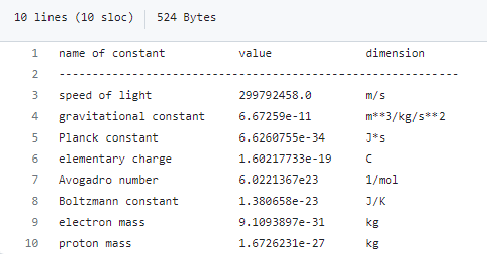

In [23]:
from IPython.display import Image

# Exibir a imagem
image_path = 'C:/Users/Cliente/Desktop/Métodos computacionais/imagem.png'
Image(filename=image_path)

In [24]:
import requests 
import re

def main():
    ## Define a URL do arquivo de texto no GitHub
    url = "https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/constants.txt" 

    ## Faz uma requisição GET à URL especificada e armazena a resposta na variável `response`
    response = requests.get(url) 

    ## Decodifica o conteúdo da resposta como uma string usando UTF-8 e armazena na variável `content`
    content = response.content.decode('utf-8') 

    ## Printando 
    print(content)   ## quebra o conteúdo em linhas e retorna uma lista
    linhas = content.splitlines()

    ## Deletando os dois primeiros elementos da lista, pois não interessa o cabeçalho e o --- da string
    del linhas[:2]

    ## Declarando um dicionário vazio
    my_dict = {}

    # Loop pelas linhas do arquivo
    for line in linhas:
        # Usa regex para separar as informações em grupos
        match = re.match(r'^(.*?)\s{2,}(.*?)\s{2,}(.*)$', line)
        if match:
            # Extrai os grupos
            titulo, valor, unidade = match.groups()
            # Adiciona ao dicionário
            my_dict[titulo] = (valor, unidade)

    # Imprime o dicionário
    print(my_dict)

if __name__ == '__main__':
    main() 


name of constant           value              dimension
------------------------------------------------------------
speed of light             299792458.0        m/s
gravitational constant     6.67259e-11        m**3/kg/s**2
Planck constant            6.6260755e-34      J*s
elementary charge          1.60217733e-19     C
Avogadro number            6.0221367e23       1/mol
Boltzmann constant         1.380658e-23       J/K
electron mass              9.1093897e-31      kg
proton mass                1.6726231e-27      kg

{'speed of light': ('299792458.0', 'm/s'), 'gravitational constant': ('6.67259e-11', 'm**3/kg/s**2'), 'Planck constant': ('6.6260755e-34', 'J*s'), 'elementary charge': ('1.60217733e-19', 'C'), 'Avogadro number': ('6.0221367e23', '1/mol'), 'Boltzmann constant': ('1.380658e-23', 'J/K'), 'electron mass': ('9.1093897e-31', 'kg'), 'proton mass': ('1.6726231e-27', 'kg')}


In [25]:
import pandas as pd

# Importa a biblioteca pandas e atribui o alias pd

df = pd.read_csv("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/constants.txt", sep=r'\s{2,}')
# Lê um arquivo CSV hospedado em um repositório no GitHub, utilizando dois ou mais espaços em branco como separador de colunas
# Atribui o DataFrame resultante à variável df

df = df.drop(0)
# Remove a primeira linha do DataFrame df

dict_final = df.set_index('name of constant').T.to_dict('list')
# Configura o índice do DataFrame df para a coluna "name of constant"
# Transpõe as linhas e colunas do DataFrame df
# Converte o DataFrame df em um dicionário, onde as chaves são as colunas e os valores são as listas de valores de cada coluna

print(dict_final)

{'speed of light': [299792458.0, 'm/s'], 'gravitational constant': [6.67259e-11, 'm**3/kg/s**2'], 'Planck constant': [6.6260755e-34, 'J*s'], 'elementary charge': [1.60217733e-19, 'C'], 'Avogadro number': [6.0221367e+23, '1/mol'], 'Boltzmann constant': [1.380658e-23, 'J/K'], 'electron mass': [9.109389700000001e-31, 'kg'], 'proton mass': [1.6726231e-27, 'kg']}


C:\Users\Cliente\AppData\Local\Temp\ipykernel_13480\2916728976.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("https://raw.githubusercontent.com/hplgit/scipro-primer/master/src/dictstring/constants.txt", sep=r'\s{2,}')
